In [2]:
import numpy as np
from sklearn.svm import SVC, SVR
import mglearn
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions

warnings.filterwarnings(action='ignore')

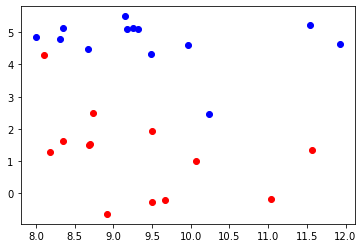

[[ 8.1062269   4.28695977]
 [ 8.7337095   2.49162431]
 [11.563957    1.3389402 ]
 [ 8.67494727  4.47573059]
 [10.24028948  2.45544401]
 [ 7.99815287  4.8525051 ]]


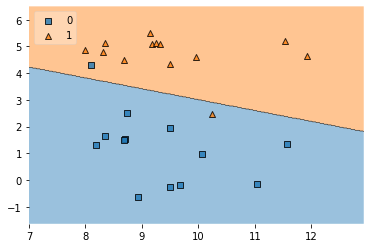

In [31]:
# training data set
x_data, t_data = mglearn.datasets.make_forge()
# t_data가 0인 경우 red로 , 1인경우 blue로 표현

x_data_red = x_data[t_data==0]
x_data_blue = x_data[t_data==1]
plt.scatter(x_data_red[:,0], x_data_red[:,1], color='r')
plt.scatter(x_data_blue[:,0], x_data_blue[:,1], color='b')
plt.show()

# model
model = SVC(kernel='linear', C=1)
model.fit(x_data, t_data)

print(model.support_vectors_)

plot_decision_regions(X=x_data, y=t_data, clf=model, legend=2)
plt.show()

In [32]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [70]:
# BMI 예제를 이용해서 SVC 모델을 구현하고 Decision boundaries 구하기
# 각 label별로 30개만 추출해서 사용
# 이후 모든 데이터를 이용해서 정확도가 얼마가 나오는지도 확인

import numpy as np
import pandas as pd
from sklearn.svm import SVC, SVR
import mglearn
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions


warnings.filterwarnings(action='ignore')

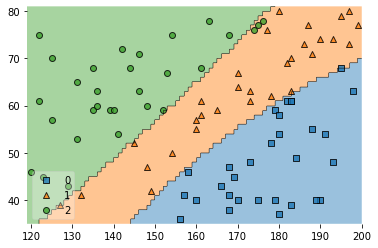

In [50]:
df = pd.read_csv('../data/bmi/bmi.csv', skiprows=3)
raw_data = df.loc[df['label']==0].head(30)
raw_data = pd.concat([raw_data, df.loc[df['label']==1].head(30)])
raw_data = pd.concat([raw_data, df.loc[df['label']==2].head(30)])

model = SVC(C=5)
model.fit(raw_data.drop(columns='label').values, raw_data['label'].values)

plot_decision_regions(X=raw_data.drop(columns='label').values, 
                      y=raw_data['label'].values, 
                      clf=model, legend=3)
plt.show()

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

x_data = df.drop(columns='label').copy().values
t_data = df['label'].values

x_train, x_test, t_train, t_test = \
train_test_split(x_data, t_data, test_size=0.2, random_state=0)

model_f = SVC(kernel='linear')
model_f.fit(x_train, t_train)

result = model_f.predict(x_test)
print(classification_report(t_test, result))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1276
           1       0.97      0.97      0.97      1158
           2       0.99      0.99      0.99      1566

    accuracy                           0.98      4000
   macro avg       0.98      0.98      0.98      4000
weighted avg       0.98      0.98      0.98      4000



# Grid SearchCV

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'kernel': ['liner'],
     'C': [10,30,100,300,1000,3000,10000,30000]},
    {'kernel': ['rbf'],
     'C': [1,3,10,30,100,300,1000,3000],
     'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]}
]

model_g = SVC()

grid_search = GridSearchCV(model_g, param_grid,
                           cv=5, scoring='accuracy', verbose=2)

grid_search.fit(x_train, t_train)

print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits
[CV] END .................................C=10, kernel=liner; total time=   0.0s
[CV] END .................................C=10, kernel=liner; total time=   0.0s
[CV] END .................................C=10, kernel=liner; total time=   0.0s
[CV] END .................................C=10, kernel=liner; total time=   0.0s
[CV] END .................................C=10, kernel=liner; total time=   0.0s
[CV] END .................................C=30, kernel=liner; total time=   0.0s
[CV] END .................................C=30, kernel=liner; total time=   0.0s
[CV] END .................................C=30, kernel=liner; total time=   0.0s
[CV] END .................................C=30, kernel=liner; total time=   0.0s
[CV] END .................................C=30, kernel=liner; total time=   0.0s
[CV] END ................................C=100, kernel=liner; total time=   0.0s
[CV] END ................................C=100,

[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   0.4s
[CV] END .......................C=10, gamma=0.03, kernel=rbf; total time=   0.8s
[CV] END .......................C=10, gamma=0.03, kernel=rbf; total time=   0.7s
[CV] END .......................C=10, gamma=0.03, kernel=rbf; total time=   0.8s
[CV] END .......................C=10, gamma=0.03, kernel=rbf; total time=   0.8s
[CV] END .......................C=10, gamma=0.03, kernel=rbf; total time=   0.8s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END ........................C=10, gamma=0.1, kernel=rbf; total time=   2.2s
[CV] END ...................

[CV] END .......................C=300, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END .......................C=300, gamma=0.1, kernel=rbf; total time=   2.3s
[CV] END .......................C=300, gamma=0.3, kernel=rbf; total time=   6.3s
[CV] END .......................C=300, gamma=0.3, kernel=rbf; total time=   6.3s
[CV] END .......................C=300, gamma=0.3, kernel=rbf; total time=   6.6s
[CV] END .......................C=300, gamma=0.3, kernel=rbf; total time=   6.7s
[CV] END .......................C=300, gamma=0.3, kernel=rbf; total time=   6.2s
[CV] END .......................C=300, gamma=1.0, kernel=rbf; total time=   6.7s
[CV] END .......................C=300, gamma=1.0, kernel=rbf; total time=   6.7s
[CV] END .......................C=300, gamma=1.0, kernel=rbf; total time=   6.8s
[CV] END .......................C=300, gamma=1.0, kernel=rbf; total time=   6.8s
[CV] END .......................C=300, gamma=1.0, kernel=rbf; total time=   6.8s
[CV] END ...................

# Randomized SearchCV

In [ ]:
from scipy.stats import expon, reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'kernel': ['linear', 'rbf'],
    # 로그 분포
    'C': reciprocal(20,200000),
    # 지수 분포
    'gamma': expon(scale=1.0)
}

model_r = SVC()

# n_iter : 랜덤하게 값을 몇번 추출할것인가 - C, gamma값 추출 횟수
random_search = RandomizedSearchCV(model_r, param_dist, cv=5,
                                   n_iter=50, scoring='accuracy', verbose=2)

random_search.fit(x_train, t_train)

print(random_search.best_params_)
print(random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END C=3018.0473520534547, gamma=0.620774341633298, kernel=linear; total time= 2.5min
[CV] END C=3018.0473520534547, gamma=0.620774341633298, kernel=linear; total time= 2.4min
[CV] END C=3018.0473520534547, gamma=0.620774341633298, kernel=linear; total time= 2.8min
[CV] END C=3018.0473520534547, gamma=0.620774341633298, kernel=linear; total time= 2.2min
[CV] END C=3018.0473520534547, gamma=0.620774341633298, kernel=linear; total time= 2.3min
[CV] END C=32.324186716023455, gamma=0.04535356789145562, kernel=rbf; total time=   1.1s
[CV] END C=32.324186716023455, gamma=0.04535356789145562, kernel=rbf; total time=   1.1s
[CV] END C=32.324186716023455, gamma=0.04535356789145562, kernel=rbf; total time=   1.1s
[CV] END C=32.324186716023455, gamma=0.04535356789145562, kernel=rbf; total time=   1.1s
[CV] END C=32.324186716023455, gamma=0.04535356789145562, kernel=rbf; total time=   1.0s
[CV] END C=339.217554707337, gamma=1.009895

[CV] END C=108610.29829208256, gamma=0.35756404318161944, kernel=rbf; total time=   6.4s
[CV] END C=108610.29829208256, gamma=0.35756404318161944, kernel=rbf; total time=   7.0s
[CV] END C=108610.29829208256, gamma=0.35756404318161944, kernel=rbf; total time=   7.0s
[CV] END C=19368.38638782821, gamma=0.26406979526782226, kernel=rbf; total time=   5.5s
[CV] END C=19368.38638782821, gamma=0.26406979526782226, kernel=rbf; total time=   5.6s
[CV] END C=19368.38638782821, gamma=0.26406979526782226, kernel=rbf; total time=   5.6s
[CV] END C=19368.38638782821, gamma=0.26406979526782226, kernel=rbf; total time=   5.6s
[CV] END C=19368.38638782821, gamma=0.26406979526782226, kernel=rbf; total time=   5.6s
[CV] END C=130.9655382437265, gamma=0.37218498916301485, kernel=rbf; total time=   7.1s
[CV] END C=130.9655382437265, gamma=0.37218498916301485, kernel=rbf; total time=   8.0s
[CV] END C=130.9655382437265, gamma=0.37218498916301485, kernel=rbf; total time=   7.0s
[CV] END C=130.9655382437265,

In [ ]:
print()